# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load the Data

In [408]:
df=pd.read_csv('/content/Traffic_Accident.csv')

In [409]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [410]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [411]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [412]:
df.shape

(52000, 30)

In [413]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [414]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [415]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [416]:
# drop Unnamed+ accident_index
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['Accident_Index'], inplace=True)


In [417]:
# Convert the time to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time # Changed the format string
print(df['Time'].head())

0    16:39:00
1    14:25:00
2    10:20:00
3    21:30:00
4    00:50:00
Name: Time, dtype: object


In [418]:

# Extract the hour from the 'Time' column
df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour

# Drop time col
df.drop(columns=['Time'], inplace=True)

<ipython-input-418-0281f968c880>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'].astype(str)).dt.hour


In [419]:
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean())
df['Day_of_Week'] = df['Day_of_Week'].fillna(df['Day_of_Week'].mean())
df['Year'] = df['Year'].fillna(df['Year'].mean())


In [420]:
df['Speed_limit']= df['Speed_limit'].replace(np.nan, 0)

In [421]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [422]:
df['Pedestrian_Crossing-Human_Control']= df['Pedestrian_Crossing-Human_Control'].mode()[0]

In [423]:
df['Pedestrian_Crossing-Physical_Facilities']= df['Pedestrian_Crossing-Physical_Facilities'].mode()[0]


In [424]:
df['LSOA_of_Accident_Location']= df['LSOA_of_Accident_Location'].mode()[0]


In [425]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [426]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64
Date,object
Day_of_Week,float64


In [427]:

numerical_columns = df.select_dtypes(include=['int64', 'float64'])
categorical_columns = df.select_dtypes(include=['object'])

In [428]:
# Fill null values in numerical columns with the mean
df[numerical_columns.columns] = numerical_columns.apply(lambda x: x.fillna(x.mean()))

In [429]:

# Fill null values in categorical columns with the mode
df[categorical_columns.columns] = categorical_columns.apply(lambda x: x.fillna(x.mode()[0]))


In [430]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [431]:
df.shape

(52000, 28)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Accident_Severity'] = label_encoder.fit_transform(df['Accident_Severity'])

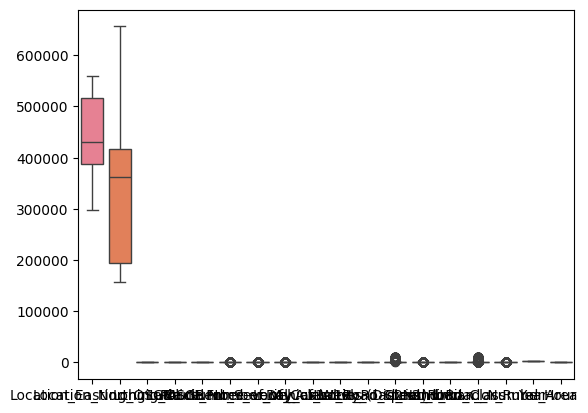

In [402]:
# check outliers

sns.boxplot(data= numerical_columns)
plt.show()

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [405]:
# scaling the numerical_columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)


In [369]:
# use pca for feature selection


import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas for data manipulation



df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='mixed')

# Convert dates to numerical timestamps
df['Date_numeric'] = df['Date'].dropna().astype(np.int64) // 10**9

# Select  num cols for imputation
#numerical_cols = df.select_dtypes(include=np.number).columns
#df_numerical = df[numerical_cols]


scaled_data = df.select_dtypes(include=np.number).columns
df_numerical = df[scaled_data]


# Handle missing values in numerical columns before applying PCA
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
scaled_data_imputed = imputer.fit_transform(df_numerical)

# Apply PCA
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(scaled_data_imputed)  # Use the imputed data

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [370]:

# The Elbow Method helps in determining the optimal number of clusters.
# It does this by plotting the within-cluster sum of squares (WCSS) against the number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

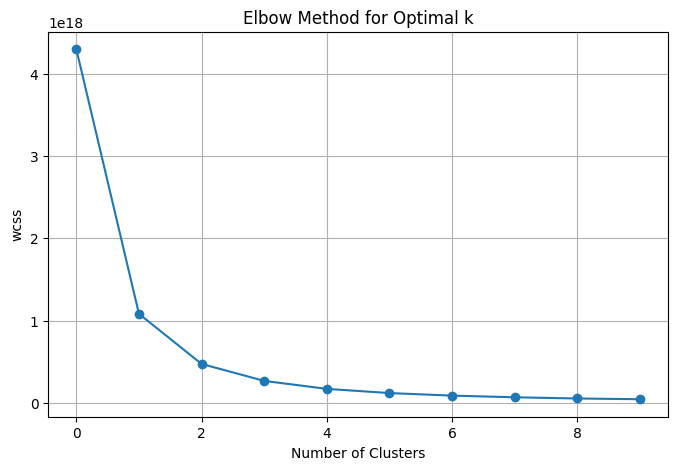

In [371]:
# Step 2: Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot( wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [372]:

optimal_clusters = 2

# Step 3: Train the K-means model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to your DataFrame (optional)
df['Cluster'] = kmeans_clusters

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               381880.0                298700.0  -2.268891  52.585773   
1               413520.0                284740.0  -1.802453  52.460412   
2               516260.0                177370.0  -0.327073  51.483290   
3               401530.0                282610.0  -1.978930  52.441426   
4               421760.0                320680.0  -1.678823  52.783240   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            21                  3                 2.0                     2   
1            20                  2                 1.0                     1   
2             1                  3                 2.0                     2   
3            20                  3                 2.0                     1   
4            21                  3                 1.0                     1   

        Date  Day_of_Week  ...                         Light_Conditions  \

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [373]:

# K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=15, random_state=0)
kmeans.fit(pca_data)

KMeans(n_clusters=2, n_init=15, random_state=0)

In [374]:
# predict the cluster group
y_kmeans = kmeans.predict(pca_data)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [375]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_data, kmeans_clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.6246187351323748


## Plot the data points with their predicted cluster center

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


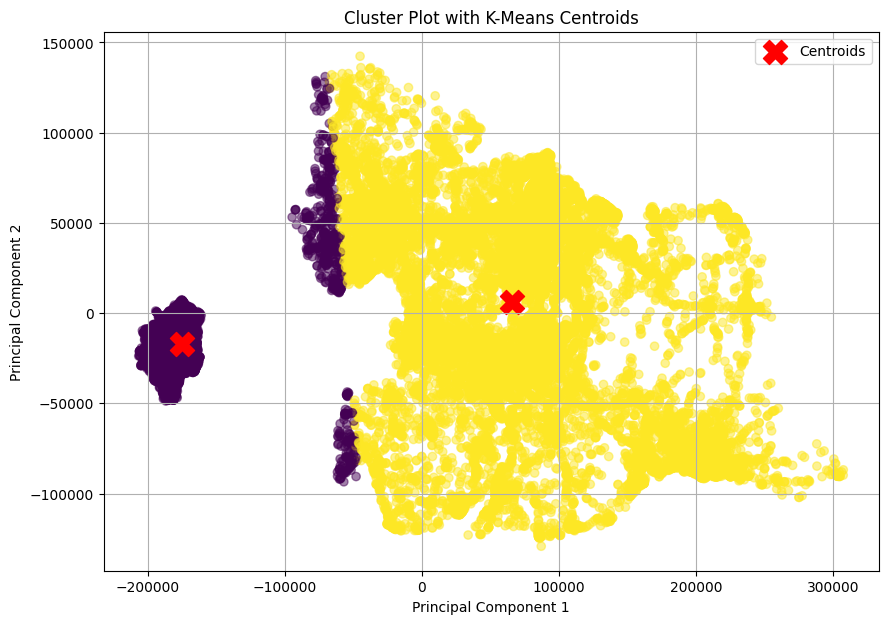

In [376]:
# Reduce PCA to 2 components for visualization
!pip install sklearn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
numerical_columns_imputed = imputer.fit_transform(numerical_columns)

# Now apply PCA
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(numerical_columns_imputed)


# Fit KMeans on the reduced data
kmeans_2d = KMeans(n_clusters=2, random_state=23)
kmeans_2d.fit(X_2d)

# Plot the clusters
plt.figure(figsize=(10,7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_2d.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Cluster Plot with K-Means Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

- I used PCA for feature selection
- I determine the optimal number based on the elbow diagram that show 'elbow ' at k=2
- I used silhouette_score method : the score near 1 means good clustering , near 0 bad cluster . my score is 0.62 which is moderate result
_ I might use ensamle methods for better results